In [46]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from numpy.random import seed
seed(1)
tf.random.set_seed(1)

In [4]:
dataset=pd.read_csv("Data/testset.csv")
dataset

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.00,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.00,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.20,0.0,North,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99565,20161231-12:00,Partly Cloudy,15.0,0,0,NaN,77.0,NaN,1015.0,0,0,18.0,0,0,0.50,110.0,ESE,NaN,NaN,7.4
99566,20161231-13:00,Partly Cloudy,16.0,0,0,NaN,100.0,NaN,1014.0,0,0,16.0,0,0,0.80,90.0,East,NaN,NaN,3.7
99567,20161231-15:00,NaN,13.0,0,0,NaN,NaN,NaN,1016.0,0,0,NaN,0,0,0.05,10.0,North,NaN,NaN,59.3
99568,20161231-18:00,Patches of Fog,12.0,1,0,NaN,100.0,NaN,1016.0,0,0,12.0,0,0,0.50,NaN,NaN,NaN,NaN,0.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99570 entries, 0 to 99569
Data columns (total 20 columns):
datetime_utc    99570 non-null object
_conds          99500 non-null object
_dewptm         98950 non-null float64
_fog            99570 non-null int64
_hail           99570 non-null int64
_heatindexm     29113 non-null float64
_hum            98814 non-null float64
_precipm        0 non-null float64
_pressurem      99338 non-null float64
_rain           99570 non-null int64
_snow           99570 non-null int64
_tempm          98898 non-null float64
_thunder        99570 non-null int64
_tornado        99570 non-null int64
_vism           95142 non-null float64
_wdird          85078 non-null float64
_wdire          85078 non-null object
_wgustm         1063 non-null float64
_windchillm     573 non-null float64
_wspdm          97212 non-null float64
dtypes: float64(11), int64(6), object(3)
memory usage: 15.2+ MB


In [6]:
dataset.describe()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,98950.000000,99570.000000,99570.000000,29113.000000,98814.000000,0.0,9.933800e+04,99570.000000,99570.000000,98898.000000,99570.000000,99570.000000,95142.000000,85078.000000,1063.000000,573.000000,97212.000000
mean,15.788388,0.068746,0.000131,35.659046,57.848260,NaN,1.945683e+03,0.026323,0.000010,25.526553,0.009300,0.000020,2.411756,162.660053,37.704516,5.708202,7.674429
std,7.085844,0.253022,0.011426,5.013863,23.765629,NaN,3.206461e+05,0.160095,0.003169,8.471719,0.095987,0.004482,20.899818,119.994031,6.841070,1.205967,11.982335
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.000000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,58.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.000000,2.000000,150.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.000000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.000000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [7]:
dataset.columns=dataset.columns.str.replace("_","")
dataset.columns=dataset.columns.str.replace(" ","")
dataset.columns

Index(['datetimeutc', 'conds', 'dewptm', 'fog', 'hail', 'heatindexm', 'hum',
       'precipm', 'pressurem', 'rain', 'snow', 'tempm', 'thunder', 'tornado',
       'vism', 'wdird', 'wdire', 'wgustm', 'windchillm', 'wspdm'],
      dtype='object')

In [8]:
# dataset.drop("conds",inplace=True,axis=1)
# dataset.drop(,inplace=True,axis=1)
# dataset.drop(,inplace=True,axis=1)
# dataset.drop(inplace=True,axis=1)
# dataset.drop(,inplace=True,axis=1)
# dataset.drop(inplace=True,axis=1)
# dataset.drop(inplace=True,axis=1)
# dataset.drop(,inplace=True,axis=1)
dataset.drop(columns=["conds","dewptm","fog","hail","heatindexm","precipm","rain","snow","thunder","tornado","vism","wdird","wdire","wgustm","windchillm"],inplace=True,axis=1)
dataset

,datetimeutc,hum,pressurem,tempm,wspdm
0,19961101-11:00,27.0,1010.0,30.0,7.4
1,19961101-12:00,32.0,-9999.0,28.0,NaN
2,19961101-13:00,44.0,-9999.0,24.0,NaN
3,19961101-14:00,41.0,1010.0,24.0,NaN
4,19961101-16:00,47.0,1011.0,23.0,0.0
...,...,...,...,...,...
99565,20161231-12:00,77.0,1015.0,18.0,7.4
99566,20161231-13:00,100.0,1014.0,16.0,3.7
99567,20161231-15:00,NaN,1016.0,NaN,59.3
99568,20161231-18:00,100.0,1016.0,12.0,0.0


In [9]:
dataset.replace(0,np.nan)
dataset.isnull().sum()

datetimeutc       0
hum             756
pressurem       232
tempm           672
wspdm          2358
dtype: int64

In [10]:
hum_median=dataset["hum"].median()
dataset["hum"].fillna(hum_median,inplace=True)
pressurem_median=dataset["pressurem"].median()
dataset["pressurem"].fillna(pressurem_median,inplace=True)
wspdm_median=dataset["wspdm"].median()
dataset["wspdm"].fillna(wspdm_median,inplace=True)
tempm_median=dataset["tempm"].median()
dataset["tempm"].fillna(tempm_median,inplace=True)

In [11]:
dataset.isnull().sum()

datetimeutc    0
hum            0
pressurem      0
tempm          0
wspdm          0
dtype: int64

In [12]:
timeseries_data=dataset.copy()

In [13]:
timeseries_data["datetimeutc"].dtype

dtype('O')

In [14]:
timeseries_data["datetimeutc"]=pd.to_datetime(timeseries_data["datetimeutc"])

In [15]:
timeseries_data.set_index("datetimeutc",inplace=True)

In [16]:
timeseries_data

,hum,pressurem,tempm,wspdm
datetimeutc,,,,
1996-11-01 11:00:00,27.0,1010.0,30.0,7.4
1996-11-01 12:00:00,32.0,-9999.0,28.0,7.4
1996-11-01 13:00:00,44.0,-9999.0,24.0,7.4
1996-11-01 14:00:00,41.0,1010.0,24.0,7.4
1996-11-01 16:00:00,47.0,1011.0,23.0,0.0
...,...,...,...,...
2016-12-31 12:00:00,77.0,1015.0,18.0,7.4
2016-12-31 13:00:00,100.0,1014.0,16.0,3.7
2016-12-31 15:00:00,58.0,1016.0,27.0,59.3


In [17]:
data_daily=timeseries_data.resample("D").mean()
data_daily

,hum,pressurem,tempm,wspdm
datetimeutc,,,,
1996-11-01,52.916667,-2659.666667,22.333333,6.166667
1996-11-02,48.625000,1009.833333,22.916667,7.950000
1996-11-03,55.958333,1010.500000,21.791667,5.020833
1996-11-04,48.055556,1011.333333,22.722222,2.266667
1996-11-05,29.400000,1011.800000,27.800000,10.020000
...,...,...,...,...
2016-12-27,67.550000,1017.200000,16.850000,8.335000
2016-12-28,68.043478,1015.565217,17.217391,3.547826
2016-12-29,87.857143,1016.904762,15.238095,6.000000


In [18]:
data_daily.isnull().sum()

hum          141
pressurem    141
tempm        141
wspdm        141
dtype: int64

In [19]:
data_daily.fillna(data_daily.mean(),inplace=True)
data_daily.isnull().sum()

hum          0
pressurem    0
tempm        0
wspdm        0
dtype: int64

In [20]:
data_daily_temp=pd.DataFrame(list(data_daily["tempm"]),columns=["temp"])

In [21]:
data_daily_temp

,temp
0,22.333333
1,22.916667
2,21.791667
3,22.722222
4,27.800000
...,...
7361,16.850000
7362,17.217391
7363,15.238095
7364,14.095238


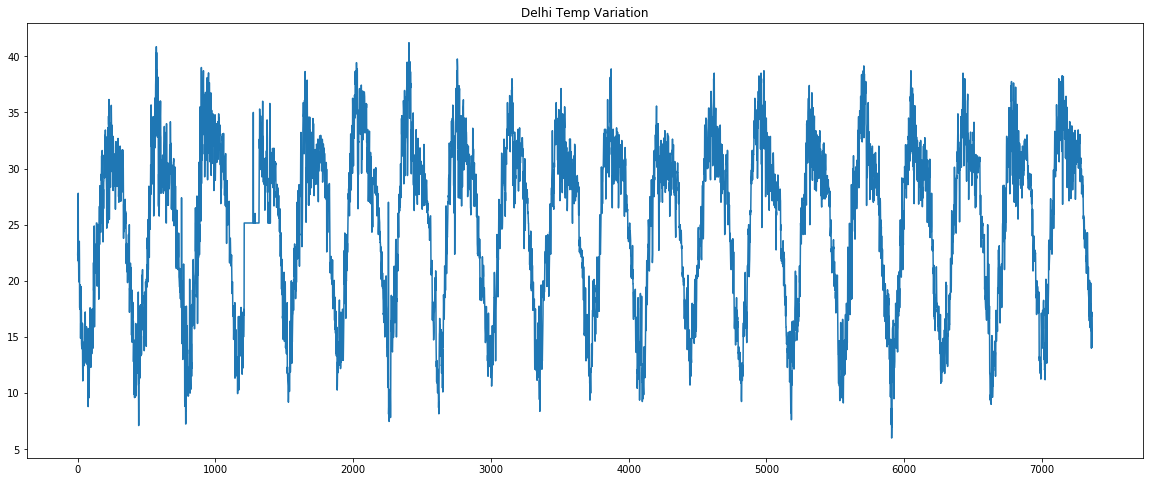

In [22]:
plt.figure(figsize=(20,8))
plt.plot(data_daily_temp)
plt.title("Delhi Temp Variation")
plt.show()

In [23]:

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
scaler=MinMaxScaler(feature_range=(-1,1))
data_daily_temp=scaler.fit_transform(data_daily_temp)

In [24]:
print(data_daily_temp)
print(data_daily_temp.shape)

[[-0.07224714]
 [-0.0391131 ]
 [-0.10301445]
 ...
 [-0.47526514]
 [-0.5401808 ]
 [-0.45186846]]
(7366, 1)


In [25]:
steps=30
X_part=[]
Y_part=[]
for i in range(len(data_daily_temp)-steps):
  X_part.append(data_daily_temp[i:i+steps])
  Y_part.append(data_daily_temp[i+steps])

X_part=np.array(X_part)
Y_part=np.array(Y_part)

print(X_part.shape)
print(Y_part.shape)

(7336, 30, 1)
(7336, 1)


In [26]:
train_X=X_part[:7000,::]
test_X=X_part[7000:,::]

train_Y=Y_part[:7000]
test_Y=Y_part[7000:]

In [43]:
from tensorflow.keras import models, layers, utils, optimizers, callbacks
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [28]:
model1=models.Sequential()
model1.add(layers.Conv1D(filters=128, kernel_size=2, activation="relu", input_shape=(30,1)))
model1.add(layers.Conv1D(filters=128, kernel_size=2, activation="relu"))
model1.add(layers.MaxPooling1D(pool_size=2))
model1.add(layers.Conv1D(filters=256, kernel_size=2, activation="relu"))
model1.add(layers.Flatten())
model1.add(layers.RepeatVector(30)) #same as input (30,1)
model1.add(layers.LSTM(units=100, return_sequences=True, activation="relu"))
model1.add(layers.Dropout(0.2))
model1.add(layers.LSTM(units=100, return_sequences=True, activation="relu"))
model1.add(layers.Dropout(0.2))
model1.add(layers.Bidirectional(layers.LSTM(units=128, activation="relu")))
model1.add(layers.Dense(100, activation="relu"))
model1.add(layers.Dense(1))

In [29]:
model1.compile(loss="mae",optimizer=optimizers.Adam(lr=0.0001))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 128)           384       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 128)           32896     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 14, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 13, 256)           65792     
_________________________________________________________________
flatten (Flatten)            (None, 3328)              0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 30, 3328)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 30, 100)           1

In [30]:
Earlystp=callbacks.EarlyStopping(monitor="loss", mode="min", patience=5, restore_best_weights=True)
Savemod=callbacks.ModelCheckpoint(filepath="model1_ts.h5", monitor="loss", save_best_only=True)

In [31]:
history=model1.fit(train_X, train_Y, epochs=200, callbacks=[Earlystp, Savemod])

Epoch 1/200
219/219 [==============================] - 66s 303ms/step - loss: 0.1429
Epoch 2/200
219/219 [==============================] - 66s 303ms/step - loss: 0.0897
Epoch 3/200
219/219 [==============================] - 66s 300ms/step - loss: 0.0818
Epoch 4/200
219/219 [==============================] - 66s 301ms/step - loss: 0.0781
Epoch 5/200
219/219 [==============================] - 66s 300ms/step - loss: 0.0778
Epoch 6/200
219/219 [==============================] - 66s 300ms/step - loss: 0.0756
Epoch 7/200
219/219 [==============================] - 66s 300ms/step - loss: 0.0740
Epoch 8/200
219/219 [==============================] - 66s 300ms/step - loss: 0.0754
Epoch 9/200
219/219 [==============================] - 66s 301ms/step - loss: 0.0731
Epoch 10/200
219/219 [==============================] - 66s 300ms/step - loss: 0.0731
Epoch 11/200
219/219 [==============================] - 66s 301ms/step - loss: 0.0728
Epoch 12/200
219/219 [==============================] - 66s 300

219/219 [==============================] - 65s 299ms/step - loss: 0.0304
Epoch 97/200
219/219 [==============================] - 65s 298ms/step - loss: 0.0294
Epoch 98/200
219/219 [==============================] - 65s 297ms/step - loss: 0.0293
Epoch 99/200
219/219 [==============================] - 66s 302ms/step - loss: 0.0285
Epoch 100/200
219/219 [==============================] - 68s 309ms/step - loss: 0.0285
Epoch 101/200
219/219 [==============================] - 66s 303ms/step - loss: 0.0278
Epoch 102/200
219/219 [==============================] - 66s 300ms/step - loss: 0.0276
Epoch 103/200
219/219 [==============================] - 66s 301ms/step - loss: 0.0269
Epoch 104/200
219/219 [==============================] - 67s 304ms/step - loss: 0.0270
Epoch 105/200
219/219 [==============================] - 65s 299ms/step - loss: 0.0270
Epoch 106/200
219/219 [==============================] - 68s 310ms/step - loss: 0.0264
Epoch 107/200
219/219 [==============================] - 77s

In [32]:
hist=history.history
train_loss=hist["loss"]
epoch=range(1,len(train_loss)+1)

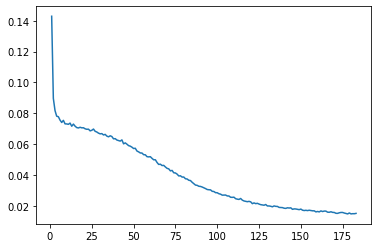

In [33]:
plt.plot(epoch,train_loss)

In [34]:
model1=models.load_model("model1_ts.h5")

In [35]:
preds=model1.predict(test_X)

In [36]:
preds=scaler.inverse_transform(preds)

In [37]:
preds

array([[16.981844],
       [14.186589],
       [16.801888],
       [17.373856],
       [14.636542],
       [17.135504],
       [13.775536],
       [15.104078],
       [14.268734],
       [18.703726],
       [19.97306 ],
       [17.591421],
       [20.662016],
       [18.973312],
       [16.867836],
       [19.580938],
       [17.668999],
       [19.7018  ],
       [20.569063],
       [21.466738],
       [20.25999 ],
       [18.897594],
       [21.299444],
       [21.596642],
       [20.992414],
       [21.983648],
       [23.73166 ],
       [24.847124],
       [24.435047],
       [23.716915],
       [22.041716],
       [23.84629 ],
       [21.523071],
       [23.22774 ],
       [25.080868],
       [23.726534],
       [23.143394],
       [23.352999],
       [25.002262],
       [24.493202],
       [25.793056],
       [24.3434  ],
       [24.134342],
       [24.351187],
       [23.938414],
       [24.354536],
       [22.287779],
       [25.730474],
       [25.17879 ],
       [27.75771 ],


In [38]:
test_Y_inv=scaler.inverse_transform(test_Y)

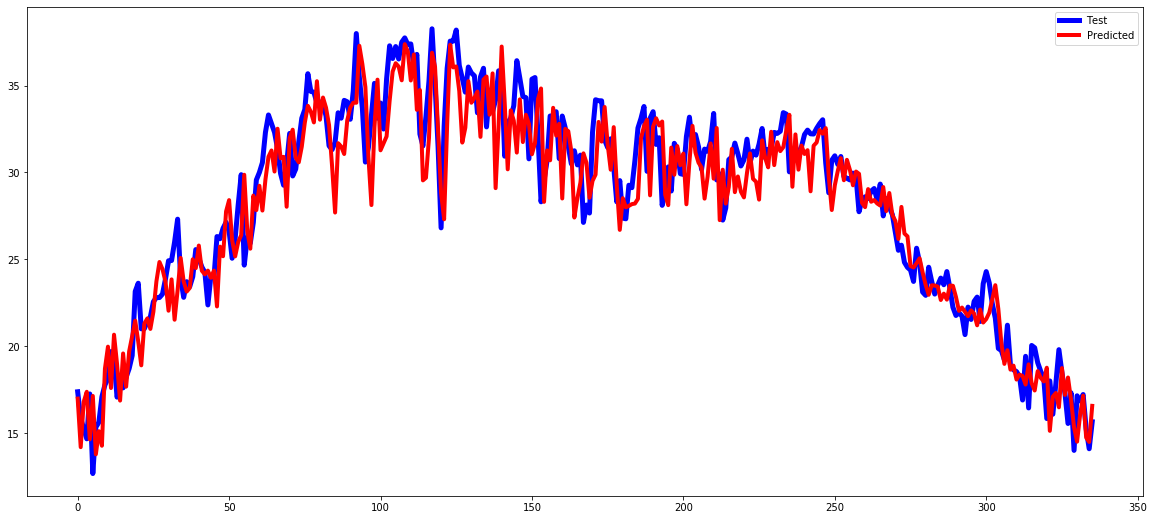

In [39]:
plt.figure(figsize=(20,9))
plt.plot(test_Y_inv,'blue',linewidth=5)
plt.plot(preds,'r',linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()

In [44]:
mse=mean_squared_error(test_Y_inv,preds)
mae=mean_absolute_error(test_Y_inv,preds)
r2=r2_score(test_Y_inv,preds)
print(f'{mse} {mae} {r2}')

3.9548396617258392 1.5777395210445402 0.8915861826025074
